In [108]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [109]:
# load the dataset
temp_df =read_csv('multimeasurementsData.csv', usecols=[1], engine='python')
temp = temp_df.values
temp = temp.astype('float32')


humidity_df = read_csv('multimeasurementsData.csv', usecols=[2], engine='python')
humidity = humidity_df.values
humidity = humidity.astype('float32')

soil_moisture_df = read_csv('multimeasurementsData.csv', usecols=[3], engine='python')
soil_moisture = soil_moisture_df.values
soil_moisture = soil_moisture.astype('float32')

uv_df =read_csv('multimeasurementsData.csv', usecols=[4], engine='python')
uv = uv_df.values
uv = uv.astype('float32')

rain_df = read_csv('multimeasurementsData.csv', usecols=[5], engine='python')
rain = rain_df.values
rain = rain.astype('float32')




In [110]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


# fix random seed for reproducibility
tf.random.set_seed(7)

In [111]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))

temp = scaler.fit_transform(temp)
humidity = scaler.fit_transform(humidity)
soil_moisture = scaler.fit_transform(soil_moisture)
uv = scaler.fit_transform(uv)
rain = scaler.fit_transform(rain)


In [112]:
# split into train and test sets
temp_train_size = int(len(temp) * 0.67)
temp_test_size = len(temp) - temp_train_size
temp_train, temp_test = temp[0:temp_train_size, :], temp[temp_train_size:len(temp), :]

humidity_train_size = int(len(humidity) * 0.67)
humidity_test_size = len(humidity) - humidity_train_size
humidity_train, humidity_test = humidity[0:humidity_train_size, :], humidity[humidity_train_size:len(humidity), :]

soil_moisture_train_size = int(len(soil_moisture) * 0.67)
soil_moisture_test_size = len(soil_moisture) - soil_moisture_train_size
soil_moisture_train, soil_moisture_test = soil_moisture[0:soil_moisture_train_size, :], soil_moisture[soil_moisture_train_size:len(soil_moisture), :]

uv_train_size = int(len(uv) * 0.67)
uv_test_size = len(uv) - uv_train_size
uv_train, uv_test = uv[0:uv_train_size, :], uv[uv_train_size:len(uv), :]

rain_train_size = int(len(rain) * 0.67)
rain_test_size = len(rain) - rain_train_size
rain_train, rain_test = rain[0:rain_train_size, :], rain[rain_train_size:len(rain), :]

In [113]:
# reshape into X=t and Y=t+1
look_back = 1

temp_trainX, temp_trainY = create_dataset(temp_train, look_back)
temp_testX, temp_testY = create_dataset(temp_test, look_back)

humidity_trainX, humidity_trainY = create_dataset(humidity_train, look_back)
humidity_testX, humidity_testY = create_dataset(humidity_test, look_back)

soil_moisture_trainX, soil_moisture_trainY = create_dataset(soil_moisture_train, look_back)
soil_moisture_testX, soil_moisture_testY = create_dataset(soil_moisture_test, look_back)

uv_trainX, uv_trainY = create_dataset(uv_train, look_back)
uv_testX, uv_testY = create_dataset(uv_test, look_back)

rain_trainX, rain_trainY = create_dataset(rain_train, look_back)
rain_testX, rain_testY = create_dataset(rain_test, look_back)

In [114]:
# reshape input to be [samples, time steps, features]
temp_trainX = np.reshape(temp_trainX, (temp_trainX.shape[0], 1, temp_trainX.shape[1]))
temp_testX = np.reshape(temp_testX, (temp_testX.shape[0], 1, temp_testX.shape[1]))

humidity_trainX = np.reshape(humidity_trainX, (humidity_trainX.shape[0], 1, humidity_trainX.shape[1]))
humidity_testX = np.reshape(humidity_testX, (humidity_testX.shape[0], 1, humidity_testX.shape[1]))

soil_moisture_trainX = np.reshape(soil_moisture_trainX, (soil_moisture_trainX.shape[0], 1, soil_moisture_trainX.shape[1]))
soil_moisture_testX = np.reshape(soil_moisture_testX, (soil_moisture_testX.shape[0], 1, soil_moisture_testX.shape[1]))

uv_trainX = np.reshape(uv_trainX, (uv_trainX.shape[0], 1, uv_trainX.shape[1]))
uv_testX = np.reshape(uv_testX, (uv_testX.shape[0], 1, uv_testX.shape[1]))

rain_trainX = np.reshape(rain_trainX, (rain_trainX.shape[0], 1, rain_trainX.shape[1]))
rain_testX = np.reshape(rain_testX, (rain_testX.shape[0], 1, rain_testX.shape[1]))

In [115]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [116]:
# Create separate models for each variable
temp_model = create_lstm_model()
humidity_model = create_lstm_model()
soil_moisture_model = create_lstm_model()
uv_model = create_lstm_model()
rain_model = create_lstm_model()

# Fit and predict for each variable
temp_model.fit(temp_trainX, temp_trainY, epochs=100, batch_size=1, verbose=2)
temp_trainPredict = temp_model.predict(temp_trainX)
temp_testPredict = temp_model.predict(temp_testX)

humidity_model.fit(humidity_trainX, humidity_trainY,epochs=100, batch_size=1, verbose=2)
humidity_trainPredict = humidity_model.predict(humidity_trainX)
humidity_testPredict = humidity_model.predict(humidity_testX)

soil_moisture_model.fit(
    soil_moisture_trainX, soil_moisture_trainY, epochs=100, batch_size=1, verbose=2)
soil_moisture_trainPredict = soil_moisture_model.predict(soil_moisture_trainX)
soil_moisture_testPredict = soil_moisture_model.predict(soil_moisture_testX)

rain_model.fit(rain_trainX, rain_trainY, epochs=100, batch_size=1, verbose=2)
rain_trainPredict = rain_model.predict(rain_trainX)
rain_testPredict = rain_model.predict(rain_testX)

uv_model.fit(uv_trainX, uv_trainY, epochs=100, batch_size=1, verbose=2)
uv_trainPredict = uv_model.predict(uv_trainX)
uv_testPredict = uv_model.predict(uv_testX)


Epoch 1/100
65/65 - 1s - loss: 0.3965 - 1s/epoch - 17ms/step
Epoch 2/100
65/65 - 0s - loss: 0.2603 - 91ms/epoch - 1ms/step
Epoch 3/100
65/65 - 0s - loss: 0.1643 - 104ms/epoch - 2ms/step
Epoch 4/100
65/65 - 0s - loss: 0.1022 - 108ms/epoch - 2ms/step
Epoch 5/100
65/65 - 0s - loss: 0.0683 - 96ms/epoch - 1ms/step
Epoch 6/100
65/65 - 0s - loss: 0.0520 - 100ms/epoch - 2ms/step
Epoch 7/100
65/65 - 0s - loss: 0.0438 - 100ms/epoch - 2ms/step
Epoch 8/100
65/65 - 0s - loss: 0.0401 - 101ms/epoch - 2ms/step
Epoch 9/100
65/65 - 0s - loss: 0.0377 - 80ms/epoch - 1ms/step
Epoch 10/100
65/65 - 0s - loss: 0.0357 - 79ms/epoch - 1ms/step
Epoch 11/100
65/65 - 0s - loss: 0.0339 - 87ms/epoch - 1ms/step
Epoch 12/100
65/65 - 0s - loss: 0.0324 - 96ms/epoch - 1ms/step
Epoch 13/100
65/65 - 0s - loss: 0.0306 - 84ms/epoch - 1ms/step
Epoch 14/100
65/65 - 0s - loss: 0.0288 - 75ms/epoch - 1ms/step
Epoch 15/100
65/65 - 0s - loss: 0.0274 - 83ms/epoch - 1ms/step
Epoch 16/100
65/65 - 0s - loss: 0.0261 - 86ms/epoch - 1ms/st

In [117]:
# invert predictions
temp_trainPredict = scaler.inverse_transform(temp_trainPredict)
temp_trainY = scaler.inverse_transform([temp_trainY])
temp_testPredict = scaler.inverse_transform(temp_testPredict)
temp_testY = scaler.inverse_transform([temp_testY])

humidity_trainPredict = scaler.inverse_transform(humidity_trainPredict)
humidity_trainY = scaler.inverse_transform([humidity_trainY])
humidity_testPredict = scaler.inverse_transform(humidity_testPredict)
humidity_testY = scaler.inverse_transform([humidity_testY])

soil_moisture_trainPredict = scaler.inverse_transform(soil_moisture_trainPredict)
soil_moisture_trainY = scaler.inverse_transform([soil_moisture_trainY])
soil_moisture_testPredict = scaler.inverse_transform(soil_moisture_testPredict)
soil_moisture_testY = scaler.inverse_transform([soil_moisture_testY])

uv_trainPredict = scaler.inverse_transform(uv_trainPredict)
uv_trainY = scaler.inverse_transform([uv_trainY])
uv_testPredict = scaler.inverse_transform(uv_testPredict)
uv_testY = scaler.inverse_transform([uv_testY])

rain_trainPredict = scaler.inverse_transform(rain_trainPredict)
rain_trainY = scaler.inverse_transform([rain_trainY])
rain_testPredict = scaler.inverse_transform(rain_testPredict)
rain_testY = scaler.inverse_transform([rain_testY])

In [118]:
# calculate root mean squared error
temp_trainScore = np.sqrt(mean_squared_error(temp_trainY[0], temp_trainPredict[:, 0]))
print('Temp train Score: %.2f RMSE' % (temp_trainScore))
temp_testScore = np.sqrt(mean_squared_error(temp_testY[0], temp_testPredict[:, 0]))
print('Temp test Score: %.2f RMSE' % (temp_testScore))

humidity_trainScore = np.sqrt(mean_squared_error(humidity_trainY[0], humidity_trainPredict[:, 0]))
print('Humidity train Score: %.2f RMSE' % (humidity_trainScore))
humidity_testScore = np.sqrt(mean_squared_error(humidity_testY[0], humidity_testPredict[:, 0]))
print('Humidity test Score: %.2f RMSE' % (humidity_testScore))

soil_moisture_trainScore = np.sqrt(mean_squared_error(soil_moisture_trainY[0], soil_moisture_trainPredict[:, 0]))
print('Soil moisture train Score: %.2f RMSE' % (soil_moisture_trainScore))
soil_moisture_testScore = np.sqrt(mean_squared_error(soil_moisture_testY[0], soil_moisture_testPredict[:, 0]))
print('Soil moisture test Score: %.2f RMSE' % (soil_moisture_testScore))

uv_trainScore = np.sqrt(mean_squared_error(uv_trainY[0], uv_trainPredict[:, 0]))
print('UV train Score: %.2f RMSE' % (uv_trainScore))
uv_testScore = np.sqrt(mean_squared_error(uv_testY[0], uv_testPredict[:, 0]))
print('UV test Score: %.2f RMSE' % (uv_testScore))

rain_trainScore = np.sqrt(mean_squared_error(rain_trainY[0], rain_trainPredict[:, 0]))
print('Rain train Score: %.2f RMSE' % (rain_trainScore))
rain_testScore = np.sqrt(mean_squared_error(rain_testY[0], rain_testPredict[:, 0]))
print('Rain test Score: %.2f RMSE' % (rain_testScore))

Temp train Score: 4.24 RMSE
Temp test Score: 4.62 RMSE
Humidity train Score: 6.44 RMSE
Humidity test Score: 5.93 RMSE
Soil moisture train Score: 4.29 RMSE
Soil moisture test Score: 4.65 RMSE
UV train Score: 6.47 RMSE
UV test Score: 5.95 RMSE
Rain train Score: 6.48 RMSE
Rain test Score: 5.95 RMSE


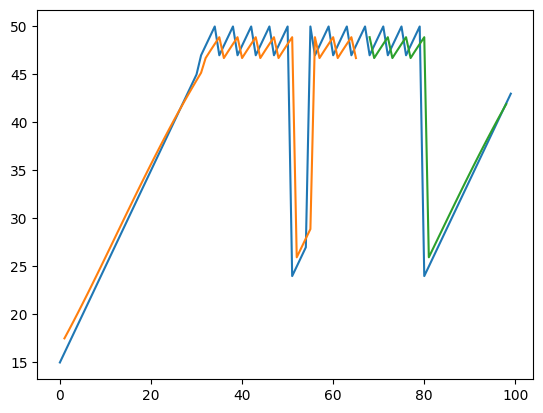

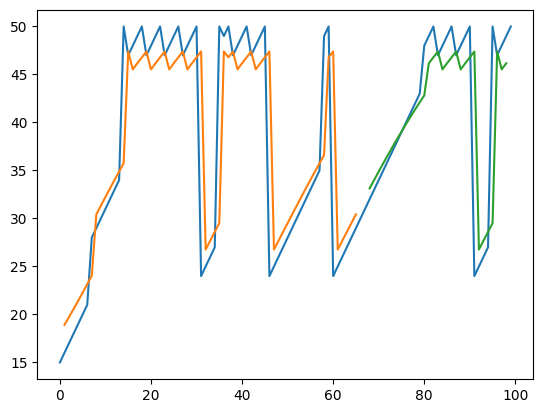

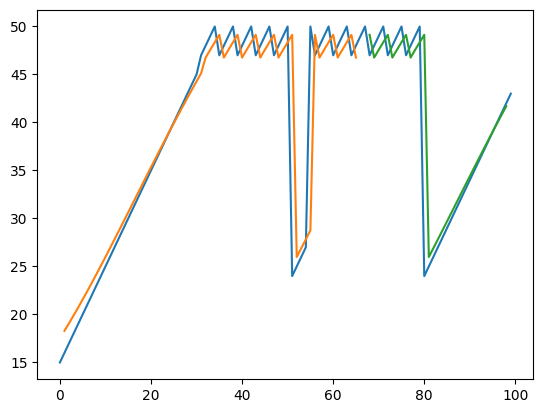

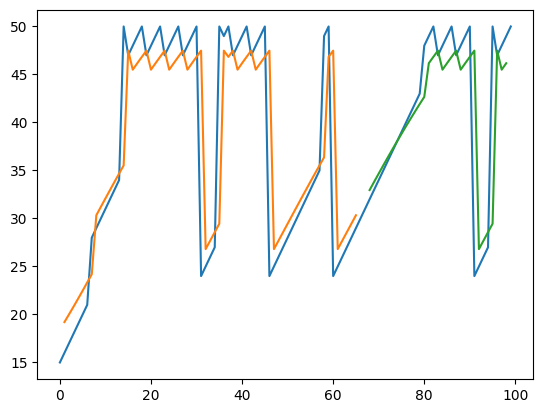

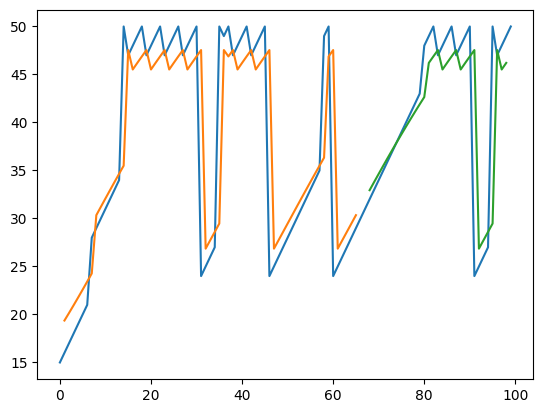

In [119]:
def plot_predictions(dataset, trainPredict, testPredict, look_back):
    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2) + 1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(dataset))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.show()


plot_predictions(temp,temp_trainPredict,temp_testPredict,look_back)
plot_predictions(humidity,humidity_trainPredict,humidity_testPredict,look_back)
plot_predictions(soil_moisture,soil_moisture_trainPredict,soil_moisture_testPredict,look_back)
plot_predictions(uv,uv_trainPredict,uv_testPredict,look_back)
plot_predictions(rain,rain_trainPredict,rain_testPredict,look_back)